In [1]:
# Her importeres Point og Daily funksjonalitetene fra meteostat modulen.
# Hvis meteostat ikke allerede er installert blir den installert.
try:
  import meteostat
except:
  !pip install meteostat
  import meteostat

In [2]:
# Her importeres modulen pandas som pd sammen med numpy og matplotlib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import  scipy.stats

In [3]:
# Her importeres funksjonaliteten datetime fra modulen datetime.
# Datetime gir oss en bekvem måte å jobbe med tidsdate på.

from datetime import datetime, timedelta

In [4]:
# Sett tidsperioden vi vil hente data fra
# Data for fremtiden kan ikke lastes inn, så når vi ber om å laste inn data får vi data helt opp til i dag.

start = datetime(1950, 1, 1)
end = datetime.today()

In [5]:
# Målestasjon Florida Bergen
bergen = meteostat.Daily('01317', start, end)
bergen = bergen.fetch()

In [6]:
# M[lestasjon Blindern Oslo
oslo = meteostat.Daily('01492', start, end)
oslo = oslo.fetch()

In [7]:
# setter endedato til å være siste dag vi har data for
end = bergen.index[-1]

In [8]:
dfk = pd.DataFrame(index=bergen.index)

In [9]:
bergen['bergen'] = 0.5*(bergen['tmin'] + bergen['tmax'])
oslo['oslo'] = 0.5*(oslo['tmin'] + oslo['tmax'])

dfk['differanse'] = bergen['bergen'] - oslo['oslo']

In [10]:
dfo = pd.DataFrame(bergen['bergen'].groupby(bergen.index.year).mean())

In [11]:
dfo['oslo'] = oslo['oslo'].groupby(oslo.index.year).mean()

In [12]:
len(dfo)

69

In [13]:
n = len(dfo)
forskjell = 1.3
EO = np.mean(dfo['oslo']) + forskjell
EB = np.mean(dfo['bergen'])
sigmayz = np.sqrt((np.mean((dfo['oslo'] + forskjell)**2) - EO**2 + np.mean(dfo['bergen']**2) - EB**2)/2)
t_verdi = (EB - EO)/(sigmayz*np.sqrt(2/n))

In [14]:
antall_frihetsgrader = len(dfo) - 1

In [15]:
np.mean(dfo['oslo'])

np.float64(6.567907286123166)

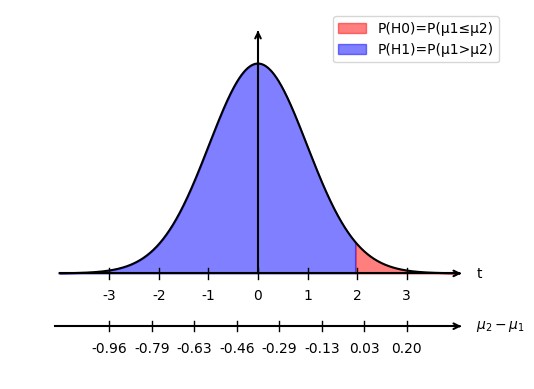

In [16]:
# @title plot
import matplotlib.pyplot as plt
import numpy as np

# Define the function
x = np.linspace(-4, 4, 1000)
yy = scipy.stats.t.pdf(x, antall_frihetsgrader)  # t-fordeling med 10 frihetsgrader
t_crit = t_verdi

def t_av_mu(m):
    return (EB -EO - m)/(sigmayz*np.sqrt(2/n))

def mu_av_t(t):
    return EB - EO - t*(sigmayz*np.sqrt(2/n))

ax = plt.gca()


plt.plot(x, yy, color='black')
plt.fill_between(x, yy, where=(x > t_crit), color='red', alpha=0.5, label=r'P(H0)=P(μ1≤μ2)')
plt.fill_between(x, yy, where=(x < t_crit), color='blue', alpha=0.5, label=r'P(H1)=P(μ1>μ2)')
# Remove default spines
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)

# Set limits
ax.set_xlim(-5, 5)
ax.set_ylim(-.2, .5)  # Ensure axes are visible

# Draw the primary x-axis (for x) with an arrow
ax.plot([-4, 4], [0, 0], color="black", lw=1.5)
ax.annotate("", xy=(4.1, 0), xytext=(4., 0),
            arrowprops=dict(arrowstyle="->", lw=1.5), annotation_clip=False)
ax.text(4.4, 0, r"t", verticalalignment="center")

# Draw the secondary x-axis (for -x) with an arrow
ax.plot([-4.1, 4], [-.1, -.1], color="black", lw=1.5)
ax.annotate("", xy=(4.1, -.1), xytext=(4., -.1),
            arrowprops=dict(arrowstyle="->", lw=1.5), annotation_clip=False)
ax.text(4.4, -.1, r"$\mu_2 - \mu_1$", verticalalignment="center")

# Draw the y-axis with an arrow
ax.plot([0, 0], [0, .45], color="black", lw=1.5)
ax.annotate("", xy=(0, .46), xytext=(0, .45),
            arrowprops=dict(arrowstyle="->", lw=1.5), annotation_clip=False)
#ax.text(-0.3, .45, r"$y$", verticalalignment="center")

# Set x-ticks for t-axis
ticks = np.arange(-3, 4, 1)  # Tick positions

# Draw ticks for t-axis
for t in ticks:
    ax.plot([t, t], [-.01, .01], color="black", lw=1)  # Small tick marks
    ax.text(t, -.05, f"{t}", fontsize=10, ha="center")  # Labels below ticks

# Set ticks for $\mu$-axis
mu_min = mu_av_t(-3)
mu_maks = mu_av_t(3)
mu_verdier = np.linspace(mu_min, mu_maks, endpoint=True, num=8)
muticks = [t_av_mu(mu) for mu in mu_verdier]
# muticks = [mu_av_t(t) for t in ticks]
# Draw ticks for secondary x-axis (-x)
for t, mu in zip(muticks, mu_verdier):
    ax.plot([t, t], [-.11, -.09], color="black", lw=1)  # Small tick marks
    ax.text(t, -.15, f"{int(-100*mu)/100:.2f}", fontsize=10, ha="center")  # Labels below ticks

# Remove y-ticks
ax.set_yticks([])
ax.set_xticks([])
plt.legend()
plt.show()


In [17]:
# Siden t-funksjonen er symmetrisk fås samme verdi ved å integrere frem til -t_verdi
p_verdi = scipy.stats.t.cdf(-t_verdi, antall_frihetsgrader)